# Sex by name using decision trees and random forest


## Load data, libraries and functions

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Constants
max_length_name = 20

# function to convert a string to a list of ascii values
def transform_string(string):
   string = string.lower()
   ascii_list = [ord(c) for c in string]
   list_ = ascii_list + [0] * (max_length_name - len(ascii_list))
   return np.array(list_).astype(np.float32)

In [4]:
#load data
names = pd.read_csv('unificado-clean.csv')
names = names.sample(frac=1, random_state=42).reset_index(drop=True)
#explore data
print(names.head())
print(names.info())

       name  sex
0    sammie    1
1  bradford    1
2   clarine    0
3     elyse    0
4  devaughn    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11741 entries, 0 to 11740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    11740 non-null  object
 1   sex     11741 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 183.6+ KB
None


In [5]:
# create X and y
X = np.asarray(names['name'].values.tolist())
y = np.asarray(names['sex'].values.tolist())

X = np.array([transform_string(val) for val in X])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
def predict(name, model_loaded):
    data = np.array([transform_string(val) for val in name])
    result = model_loaded.predict(data)
    return ['m' if logit > 0.5 else 'f' for logit in result]

In [7]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

def show_confusion_matrix(model, X, y):
    prediction = model.predict(X)
    confusion_matrix = metrics.confusion_matrix(y, prediction)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['F', 'M'])

    cm_display.plot()
    plt.show()

## Decision Trees

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=15, max_features=20)
history = tree_model.fit(X_train, y_train)

In [ ]:
tree_model_pred = tree_model.predict(X_test)
print('Accuracy of Decision Tree Model: ', accuracy_score(y_test, tree_model_pred))

Accuracy of Decision Tree Model:  0.7009536784741145


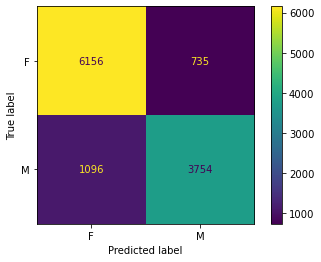

In [ ]:
show_confusion_matrix(tree_model, X, y)

## Random Forest

In [8]:
random_model = RandomForestClassifier(max_depth=15, max_features=20)
history = random_model.fit(X_train, y_train)

In [9]:
random_model_pred = random_model.predict(X_test)
print('Accuracy of Random Forest Model: ', accuracy_score(y_test, random_model_pred))

Accuracy of Random Forest Model:  0.7459128065395095


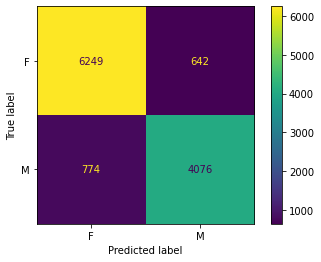

In [10]:
show_confusion_matrix(random_model, X, y)

## Tuning hiperparameters

In [12]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Decision Trees

In [ ]:
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]

	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	tree_model_op = DecisionTreeClassifier()
	# define search space
	space = dict()
	space['max_depth'] = [1, 5, 10, 15, 20, 50]
	space['max_features'] = [2, 4, 6, 8 ,10, 20]

	search = GridSearchCV(tree_model_op, space, scoring='accuracy', cv=cv_inner, refit=True)
	result = search.fit(X_train, y_train)
 
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.747, est=0.725, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.739, est=0.734, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.729, est=0.737, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.748, est=0.729, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.732, est=0.734, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.728, est=0.732, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.740, est=0.723, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.740, est=0.733, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.740, est=0.722, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.738, est=0.733, cfg={'max_depth': 10, 'max_features': 20}
Accuracy: 0.738 (0.006)


In [ ]:
tree_model_op = DecisionTreeClassifier(max_depth=10, max_features=20)
tree_model_op.fit(X_train, y_train)
tree_model_pred = tree_model_op.predict(X_test)
print('Accuracy of Decision Tree Model Optimized: ', accuracy_score(y_test, tree_model_pred))

Accuracy of Decision Tree Model Optimized:  0.737649063032368


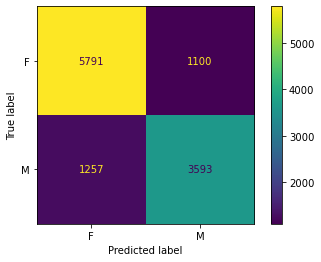

In [ ]:
show_confusion_matrix(tree_model_op, X, y)

### Random Forests

In [14]:
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]

	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	random_model_op = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [50, 100, 250,500]
	space['max_depth'] = [10, 15, 20, 50]
	space['max_features'] = [2, 6, 10, 20]

	search = GridSearchCV(random_model_op, space, scoring='accuracy', cv=cv_inner, refit=True)
	result = search.fit(X_train, y_train)
	best_model = result.best_estimator_
	yhat = best_model.predict(X_test)
 
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.760, est=0.756, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 100}
>acc=0.766, est=0.755, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
>acc=0.751, est=0.758, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 500}
>acc=0.768, est=0.754, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 50}
>acc=0.758, est=0.759, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
>acc=0.767, est=0.757, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
>acc=0.764, est=0.757, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 500}
>acc=0.761, est=0.755, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
>acc=0.767, est=0.757, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 500}
>acc=0.771, est=0.759, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 500}
Accuracy: 0.763 (0.006)


In [17]:
random_model_op = RandomForestClassifier(n_estimators=500, max_features=20, max_depth=10)
random_model_op.fit(X_train, y_train)
random_model_pred = random_model_op.predict(X_test)
print('Accuracy of Random Forest Model Optimized: ', accuracy_score(y_test, random_model_pred))

Accuracy of Random Forest Model Optimized:  0.7691652470187393


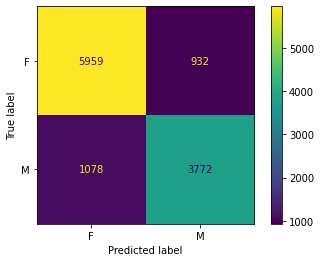

In [18]:
show_confusion_matrix(random_model_op, X, y)

## Balanced Dataset

In [19]:
names_df = names.sample(frac=1, random_state=42).reset_index(drop=True)
print(names_df.shape)
names_df.head(10)

(11741, 2)


,name,sex
0,linton,1
1,wadsworth,1
2,oralia,0
3,adolpho,1
4,guthry,1
5,thelma,0
6,berna,0
7,delphinia,0
8,oral,0
9,kimberely,0


In [20]:
print("Males count: "+str(np.sum(names_df['sex']> 0)))
print("Females count: "+str(np.sum(names_df['sex'] < 1)))

names_df = names_df.drop(names_df[names_df['sex'] < 1].sample(2041).index)

print("Males count: "+str(np.sum(names_df['sex']> 0)))
print("Females count: "+str(np.sum(names_df['sex'] < 1)))

Males count: 4850
Females count: 6891
Males count: 4850
Females count: 4850


In [21]:
#fit optimized tree
X_balanced = np.asarray(names_df['name'].values.tolist())
y_balanced = np.asarray(names_df['sex'].values.tolist())

X_balanced = np.array([transform_string(val) for val in X_balanced])

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.25, random_state=42)

In [ ]:
tree_model_op.fit(X_train_balanced,y_train_balanced)
tree_model_pred = tree_model_op.predict(X_test_balanced)
print('Accuracy of Decision Tree Model Optimized with dataset balanced: ', accuracy_score(y_test_balanced, tree_model_pred))

Accuracy of Decision Tree Model Optimized with dataset balanced:  0.7294845360824742


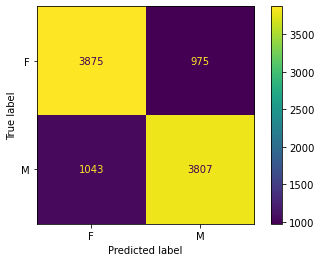

In [ ]:
show_confusion_matrix(tree_model_op,X_balanced,y_balanced)

In [22]:
random_model_op.fit(X_train_balanced,y_train_balanced)
random_model_pred = random_model_op.predict(X_test_balanced)
print('Accuracy of Random Forest Model Optimized with dataset balanced: ', accuracy_score(y_test_balanced, random_model_pred))


Accuracy of Random Forest Model Optimized with dataset balanced:  0.7616494845360825


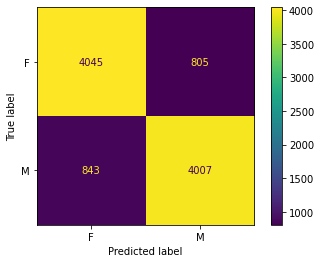

In [23]:
show_confusion_matrix(random_model_op,X_balanced,y_balanced)